In [1]:
# a script to look at post-sorting steps of spike interface

#import the necessary packages
from pathlib import Path
import platform
import os
import shutil
import argparse
import numpy as np
import matplotlib.pyplot as plt
import spikeinterface.sorters
import spikeinterface.full as si
import  scipy.signal
import spikeinterface.extractors as se
import spikeinterface.comparison
import spikeinterface.exporters
import spikeinterface.curation
import spikeinterface.widgets 
import docker
from datetime import datetime





In [5]:
#set up the base folder
base_folder = '/mnt/rds01/ibn-vision/DATA/SUBJECTS/'
mouse = 'M23032'
date = '20230720'
# ephys folder
ephys_folder = base_folder + mouse + '/ephys/' + date +'/'
print(ephys_folder)

/mnt/rds01/ibn-vision/DATA/SUBJECTS/M23032/ephys/20230720/


In [22]:
#load binary recording file
probe0_preprocessed_corrected = si.load_extractor(ephys_folder + 'probe0_preprocessed')
probe1_preprocessed_corrected = si.load_extractor(ephys_folder + 'probe1_preprocessed')

BinaryFolderRecording: 337 channels - 30.0kHz - 1 segments - 121,159,442 samples 
                       4,038.65s (1.12 hours) - int16 dtype - 76.05 GiB


In [23]:
#compare sorters

#first load the sorting
probe0_sorting_ks2_5 = spikeinterface.sorters.read_sorter_folder(ephys_folder+'/probe0/sorters/kilosort2_5/', register_recording=True, sorting_info=True, raise_error=True)
probe0_sorting_ks3 = spikeinterface.sorters.read_sorter_folder(ephys_folder+'/probe0/sorters/kilosort3/', register_recording=True, sorting_info=True, raise_error=True)
probe1_sorting_ks2_5 = spikeinterface.sorters.read_sorter_folder(ephys_folder+'/probe1/sorters/kilosort2_5/', register_recording=True, sorting_info=True, raise_error=True)
probe1_sorting_ks3 = spikeinterface.sorters.read_sorter_folder(ephys_folder+'/probe1/sorters/kilosort3/', register_recording=True, sorting_info=True, raise_error=True)
print(probe0_sorting_ks2_5)
print(probe0_sorting_ks3)
print(probe1_sorting_ks2_5)
print(probe1_sorting_ks3)

KiloSortSortingExtractor: 869 units - 1 segments - 30.0kHz
KiloSortSortingExtractor: 635 units - 1 segments - 30.0kHz
KiloSortSortingExtractor: 501 units - 1 segments - 30.0kHz
KiloSortSortingExtractor: 536 units - 1 segments - 30.0kHz


In [25]:

# set up parallel processing jobs
job_kwargs = dict(n_jobs=20, chunk_duration='1s', progress_bar=True)
#remove duplicates
probe0_sorting_ks2_5 = si.remove_duplicated_spikes(sorting = probe0_sorting_ks2_5, censored_period_ms=0.3,method='keep_first')
probe0_sorting_ks3 = si.remove_duplicated_spikes(sorting = probe0_sorting_ks3, censored_period_ms=0.3,method='keep_first')
probe1_sorting_ks2_5 = si.remove_duplicated_spikes(sorting = probe1_sorting_ks2_5, censored_period_ms=0.3,method='keep_first')
probe1_sorting_ks3 = si.remove_duplicated_spikes(sorting = probe1_sorting_ks3, censored_period_ms=0.3,method='keep_first')

print(probe0_sorting_ks2_5)
print(probe0_sorting_ks3)
print(probe1_sorting_ks2_5)
print(probe1_sorting_ks3)

RemoveDuplicatedSpikesSorting: 869 units - 1 segments - 30.0kHz
RemoveDuplicatedSpikesSorting: 635 units - 1 segments - 30.0kHz
RemoveDuplicatedSpikesSorting: 501 units - 1 segments - 30.0kHz
RemoveDuplicatedSpikesSorting: 536 units - 1 segments - 30.0kHz


         0        1      2    3     4     5       6      7      8      9    \
0      169.0  45403.0  457.0  0.0   3.0   8.0   578.0  247.0  380.0  555.0   
1    28736.0   2962.0  371.0  0.0  11.0  13.0   529.0   43.0  253.0  373.0   
2      130.0   6012.0  232.0  0.0   5.0   0.0  4253.0   96.0  135.0  197.0   
3       67.0    291.0  432.0  0.0  19.0   3.0   172.0   31.0   94.0   79.0   
4     2721.0  14050.0  150.0  0.0   0.0   7.0   626.0   71.0  180.0  240.0   
..       ...      ...    ...  ...   ...   ...     ...    ...    ...    ...   
878      3.0      4.0    1.0  0.0   0.0   0.0     2.0    0.0    0.0    3.0   
879      1.0      1.0    1.0  0.0   0.0   0.0     1.0    0.0    1.0    1.0   
880      1.0      2.0    3.0  0.0   0.0   0.0     0.0    0.0    3.0    1.0   
881      0.0      2.0    1.0  0.0   0.0   0.0     2.0    0.0    0.0    0.0   
882      2.0      8.0    2.0  0.0   0.0   1.0    13.0    3.0    2.0    3.0   

     ...     715    716     717    718     719     720  721    

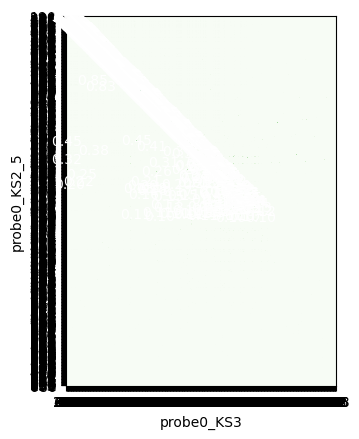

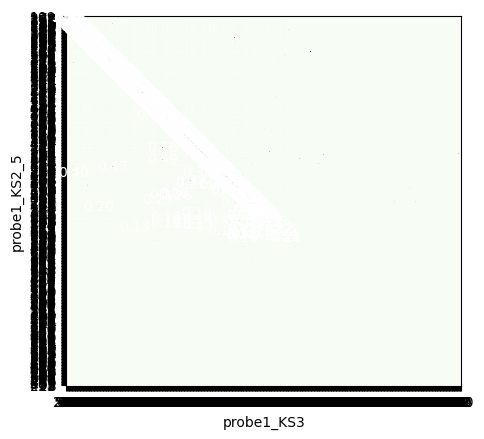

In [20]:

#now compare the sortings
probe0_compare_ks2_5_ks3 = spikeinterface.comparison.compare_two_sorters(sorting1=probe0_sorting_ks2_5, sorting2=probe0_sorting_ks3, sorting1_name='probe0_KS2_5',sorting2_name= 'probe0_KS3')
probe1_compare_ks2_5_ks3 = spikeinterface.comparison.compare_two_sorters(sorting1=probe1_sorting_ks2_5, sorting2=probe1_sorting_ks3,sorting1_name= 'probe1_KS2_5', sorting2_name='probe1_KS3')


#now plot the comparison
si.plot_agreement_matrix(probe0_compare_ks2_5_ks3)
plt.savefig(ephys_folder+'/probe0/sorters/compare_ks2_5_ks3.png')
si.plot_agreement_matrix(probe1_compare_ks2_5_ks3)
plt.savefig(ephys_folder+'/probe1/sorters/compare_ks2_5_ks3.png')


#print the agreement scores and match_event_counts
print(probe0_compare_ks2_5_ks3.match_event_count)
print(probe0_compare_ks2_5_ks3.agreement_scores)
print(probe1_compare_ks2_5_ks3.match_event_count)
print(probe1_compare_ks2_5_ks3.agreement_scores)

In [26]:
#extract waveforms from duplicate removed sortings
#extract waveforms from sorted data
probe0_we_ks2_5 = si.extract_waveforms(probe0_preprocessed_corrected, probe0_sorting_ks2_5, folder= ephys_folder +'/probe0/waveform/kilosort2_5',
                          sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2.,
                          **job_kwargs)


probe0_we_ks3 = si.extract_waveforms(probe0_preprocessed_corrected, probe0_sorting_ks3, folder=ephys_folder +'/probe0/waveform/kilosort3',
                          sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2.,
                          **job_kwargs)


probe1_we_ks2_5 = si.extract_waveforms(probe1_preprocessed_corrected, probe1_sorting_ks2_5, folder=ephys_folder +'/probe1/waveform/kilosort2_5',
                          sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2.,
                          **job_kwargs)


probe1_we_ks3 = si.extract_waveforms(probe1_preprocessed_corrected, probe1_sorting_ks3, folder=ephys_folder +'/probe1/waveform/kilosort3',
                          sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2.,
                          **job_kwargs)


extract waveforms shared_memory multi buffer:   0%|          | 0/4039 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:
#grab extracted waveforms saved on the server
probe0_we_ks2_5 = si.load_waveforms(folder = ephys_folder + 'probe0/waveform/kilosort2_5/')
probe0_we_ks3 = si.load_waveforms(folder = ephys_folder + 'probe0/waveform/kilosort3/')
probe1_we_ks2_5 = si.load_waveforms(folder = ephys_folder + 'probe1/waveform/kilosort2_5/')
probe1_we_ks3 = si.load_waveforms(folder = ephys_folder + 'probe1/waveform/kilosort3/')


In [11]:
template_metric_names = si.get_template_metric_names()

['peak_to_valley',
 'peak_trough_ratio',
 'half_width',
 'repolarization_slope',
 'recovery_slope',
 'num_positive_peaks',
 'num_negative_peaks',
 'velocity_above',
 'velocity_below',
 'exp_decay',
 'spread']

In [13]:
template_metric_probe0_ks2_5 = si.compute_template_metrics(probe0_we_ks2_5)
template_metric_probe0_ks3 = si.compute_template_metrics(probe0_we_ks3)
template_metric_probe1_ks2_5 = si.compute_template_metrics(probe1_we_ks2_5)
template_metric_probe1_ks3 = si.compute_template_metrics(probe1_we_ks3)

/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [14]:
noise_levels_probe0_ks2_5 = si.compute_noise_levels(probe0_we_ks2_5)
noise_levels_probe0_ks3 = si.compute_noise_levels(probe0_we_ks3)
noise_levels_probe1_ks2_5 = si.compute_noise_levels(probe1_we_ks2_5)
noise_levels_probe1_ks3 = si.compute_noise_levels(probe1_we_ks3)


In [15]:
PCA_probe0_ks2_5 = si.compute_principal_components(probe0_we_ks2_5)
PCA_probe0_ks3 = si.compute_principal_components(probe0_we_ks3)
PCA_probe1_ks2_5 = si.compute_principal_components(probe1_we_ks2_5)
PCA_probe1_ks3 = si.compute_principal_components(probe1_we_ks3)


Fitting PCA:   0%|          | 0/869 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/869 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/635 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/635 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/501 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/501 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/536 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/536 [00:00<?, ?it/s]

In [16]:
template_similarity_probe0_ks2_5 = si.compute_template_similarity(probe0_we_ks2_5)
template_similarity_probe0_ks3 = si.compute_template_similarity(probe0_we_ks3)
template_similarity_probe1_ks2_5 = si.compute_template_similarity(probe1_we_ks2_5)
template_similarity_probe1_ks3 = si.compute_template_similarity(probe1_we_ks3)

correlograms_probe0_ks2_5 = si.compute_correlograms(probe0_we_ks2_5)
correlograms_probe0_ks3 = si.compute_correlograms(probe0_we_ks3)
correlograms_probe1_ks2_5 = si.compute_correlograms(probe1_we_ks2_5)
correlograms_probe1_ks3 = si.compute_correlograms(probe1_we_ks3)

amplitudes_probe0_ks2_5 = si.compute_amplitudes(probe0_we_ks2_5)
amplitudes_probe0_ks3 = si.compute_amplitudes(probe0_we_ks3)
amplitudes_probe1_ks2_5 = si.compute_amplitudes(probe1_we_ks2_5)
amplitudes_probe1_ks3 = si.compute_amplitudes(probe1_we_ks3)

unit_locations_probe0_ks2_5 = si.compute_unit_locations(probe0_we_ks2_5)
unit_locations_probe0_ks3 = si.compute_unit_locations(probe0_we_ks3)
unit_locations_probe1_ks2_5 = si.compute_unit_locations(probe1_we_ks2_5)
unit_locations_probe1_ks3 = si.compute_unit_locations(probe1_we_ks3)

AttributeError: module 'spikeinterface.full' has no attribute 'compute_amplitudes'